<a href="https://colab.research.google.com/github/masp42/ML_Glass_CA/blob/main/CA_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigment Title: ML_CA
    
##   Data Dictionary of Data Set column description:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminium
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
      * -- 1 building_windows_float_processed
      * -- 2 building_windows_non_float_processed
      *-- 3 vehicle_windows_float_processed
      * -- 4 vehicle_windows_non_float_processed (none in this database)
      *-- 5 containers
      * -- 6 tableware
      *-- 7 headlamps



In [2]:
# Loading Initial Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [3]:
# Because the dataset does not contain the name of each feature, these names are being manualy passed when loading the dataset.
df = pd.read_csv("https://raw.githubusercontent.com/masp42/ML_Glass_CA/main/glass_data.csv", names=["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"])

# **1. Initial Exploratory Data Analysis / Data Visualization / Data Preparation and Cleaning**





In [4]:
df.head(20)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [5]:
print(df.shape)

(214, 11)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


***By the initial EDA above  we can verify the number of data observations (rows = 214) in the dataset and number of features (columns = 11). Dataframe shows that the data is all numerical except for the target variable ID and Type of Glass. It also shows that there are no null values in the data.***

In [119]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


***The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.***

In [7]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

***The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.***

In [121]:
Y = df ["ID"]
Y.head()

0    1
1    2
2    3
3    4
4    5
Name: ID, dtype: int64

In [122]:
df.drop('ID', axis=1, inplace=True)

In [123]:
features = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"] # define features
label = 'Type' # define label

In [124]:
df.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [125]:
print(df.shape)

(214, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


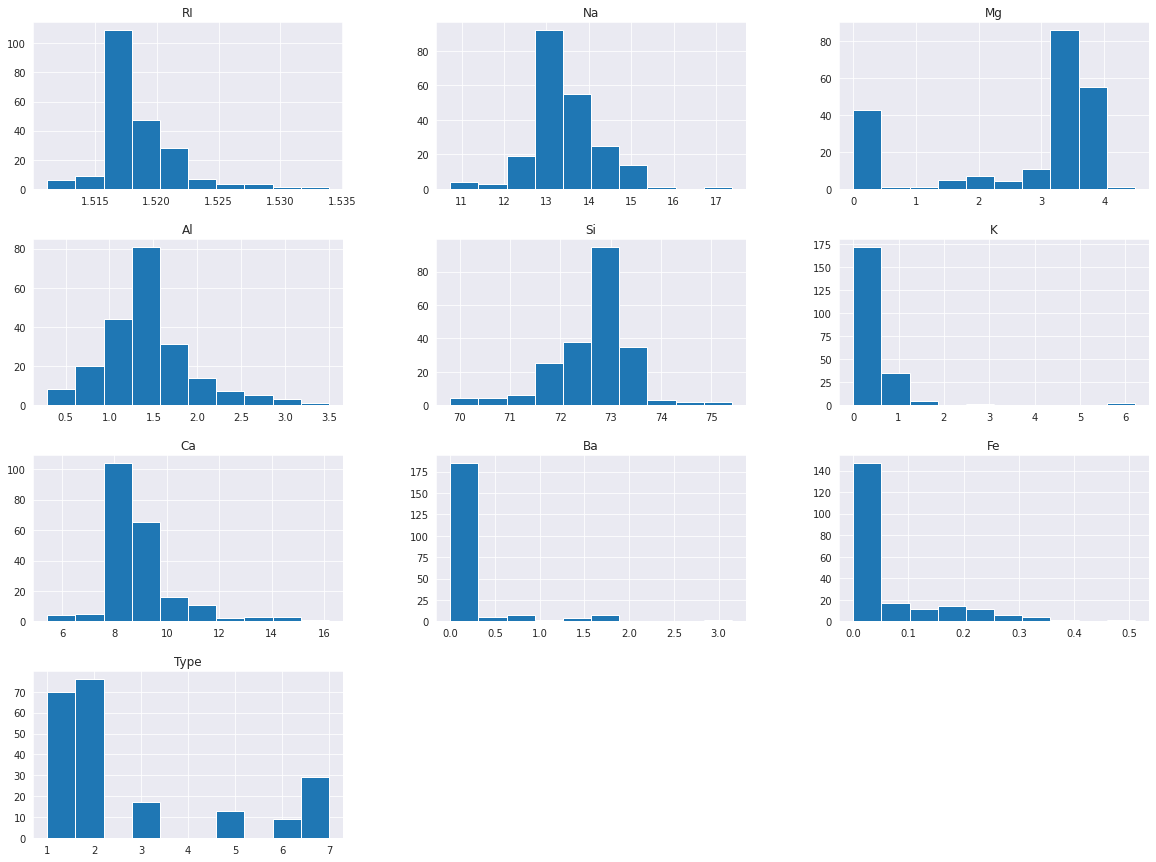

In [126]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

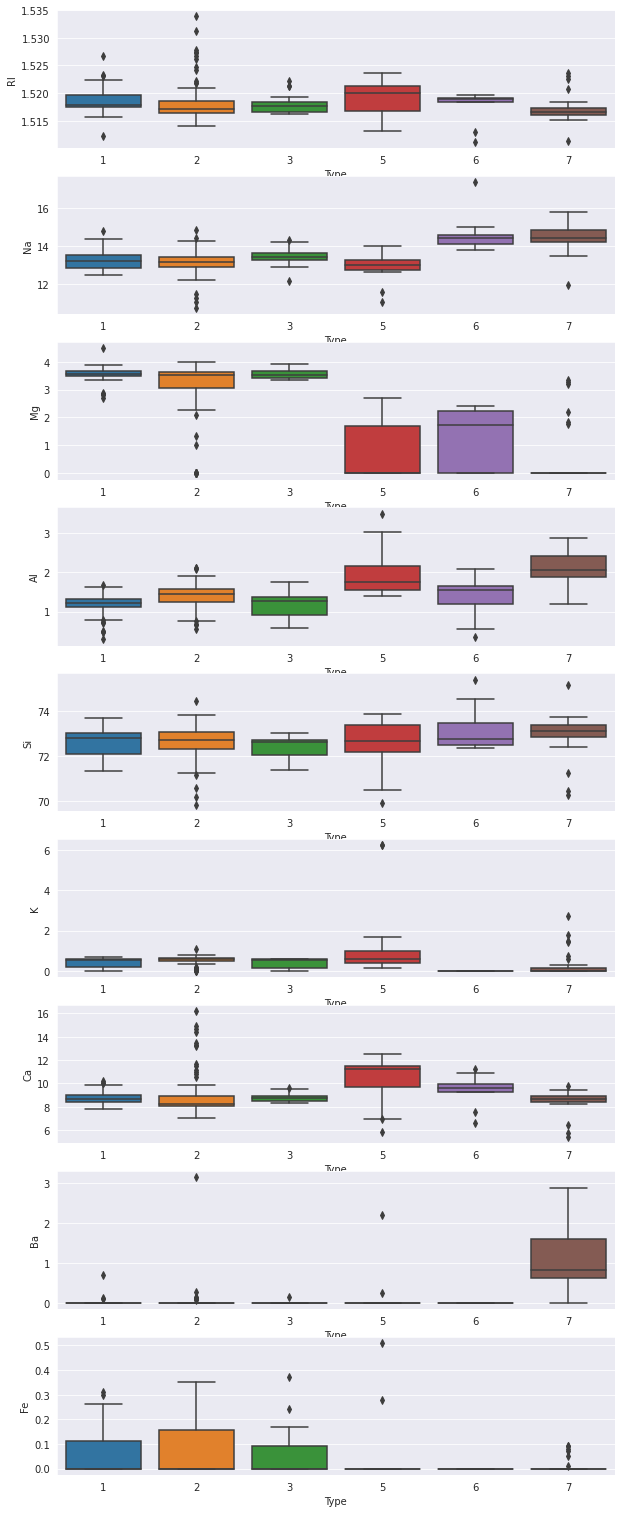

In [127]:
plot_X = df.iloc[:,:-1]
plot_y = df.iloc[:,-1]
plt.figure(figsize=(10,30))
for i,col in enumerate(plot_X,1):
    plt.subplot(10,1,i)
    sns.boxplot(y=col,x=plot_y, data=plot_X)
plt.show()

<Figure size 576x576 with 0 Axes>

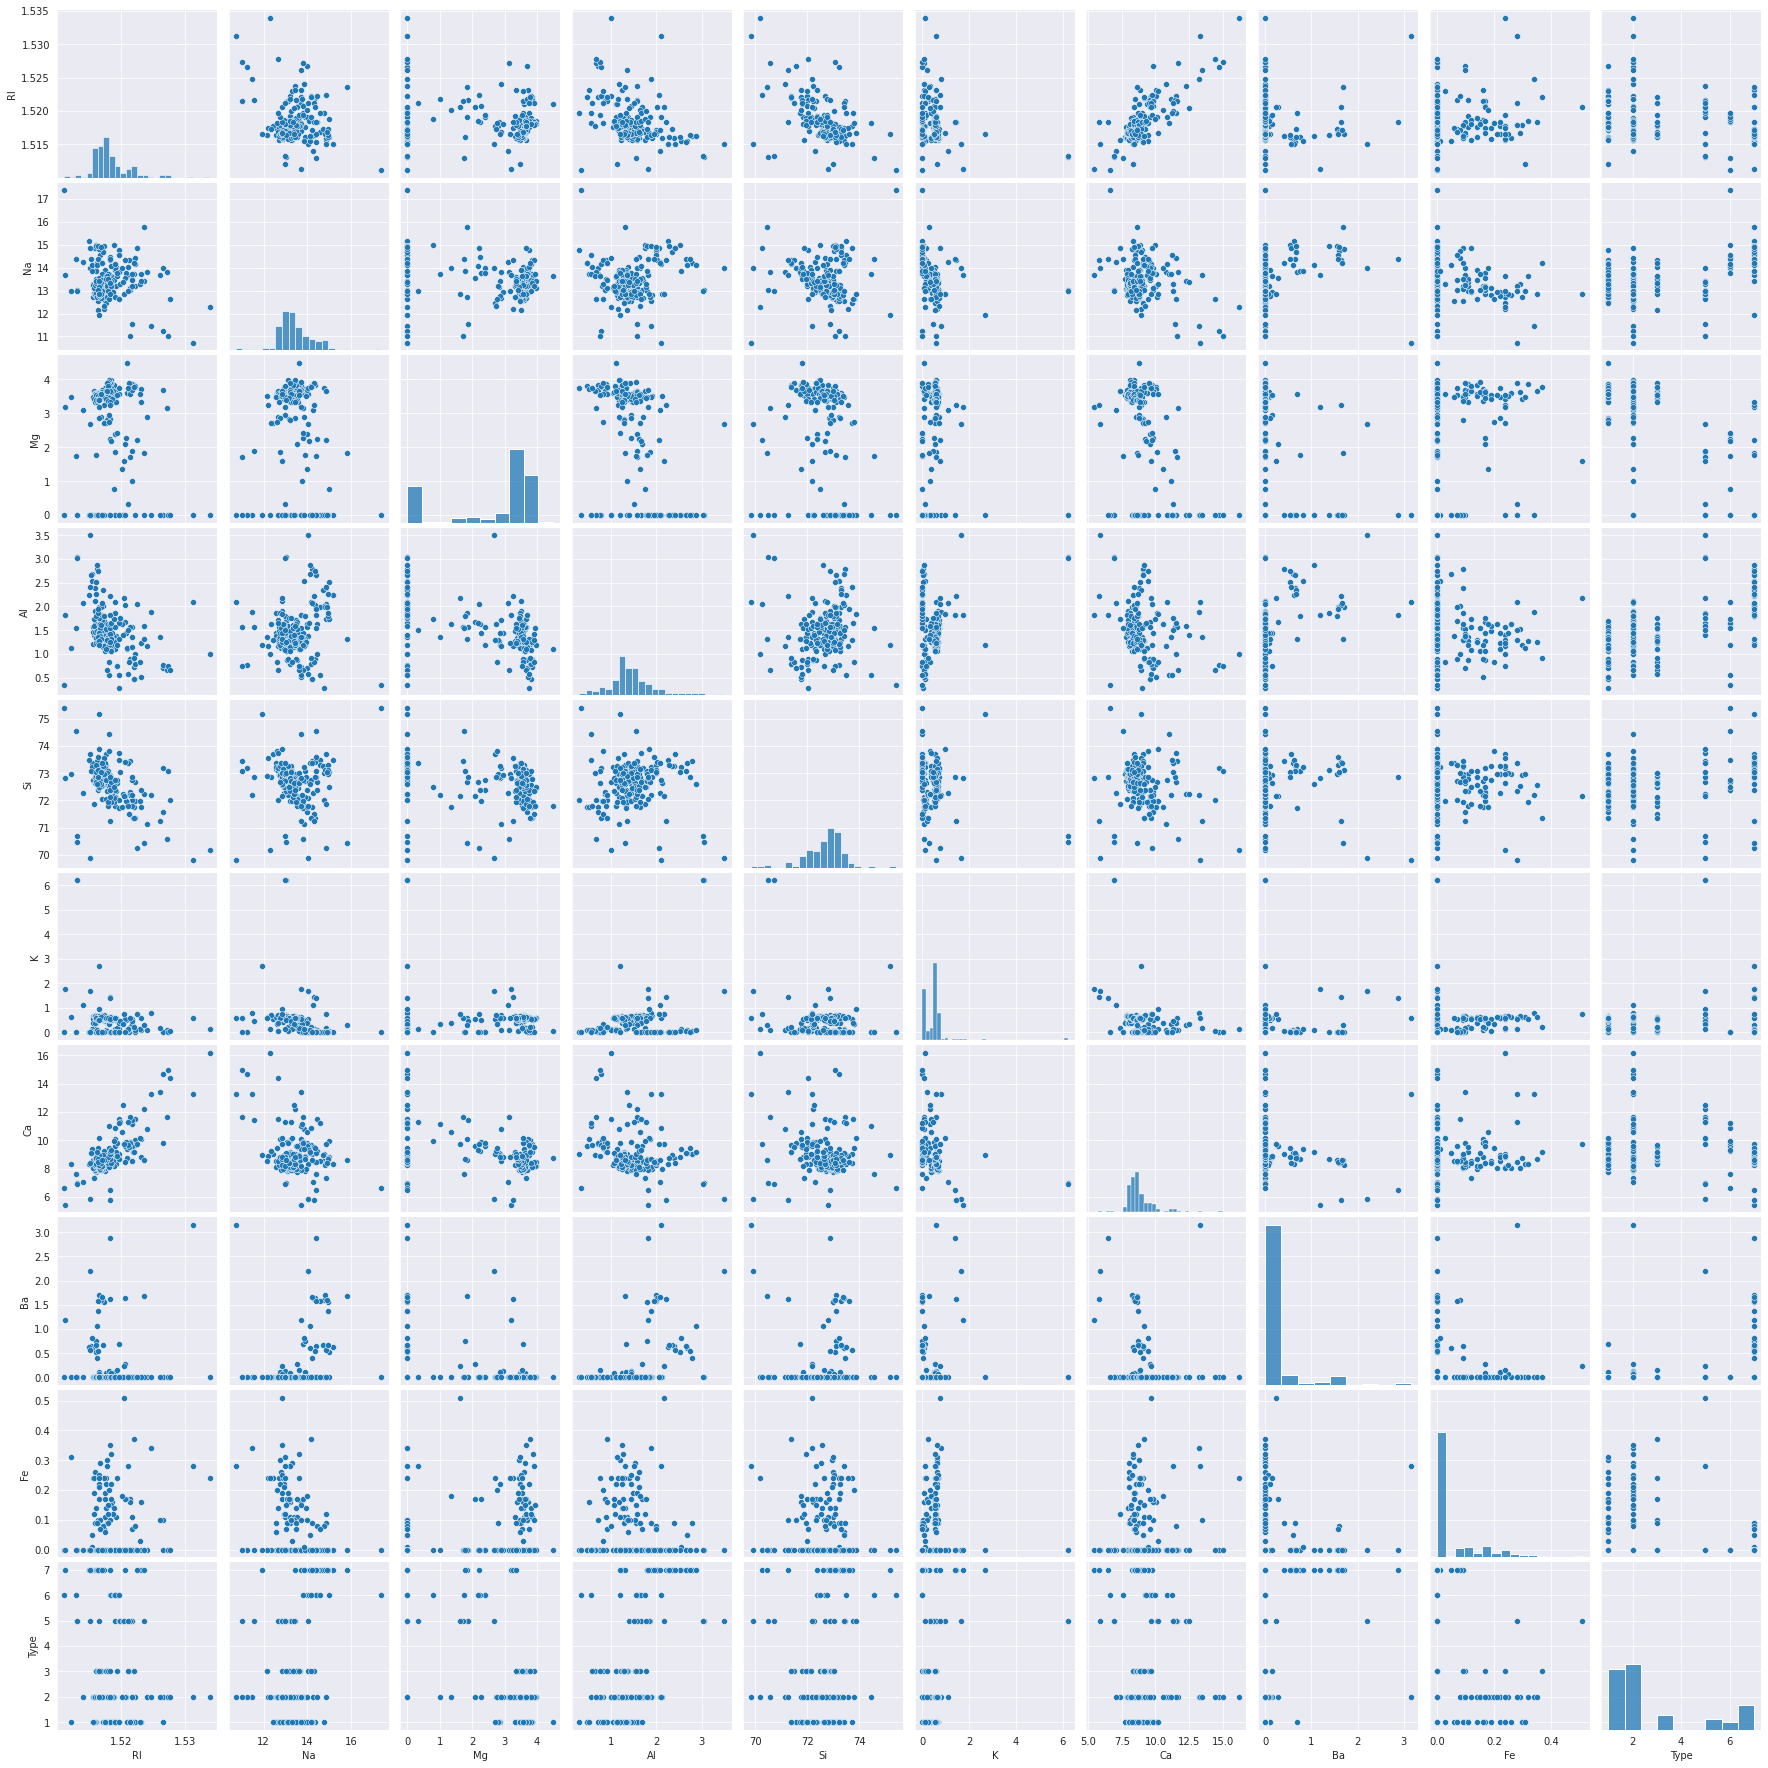

In [128]:
plt.figure(figsize=(8,8))
sns.pairplot(df,palette='coolwarm')
plt.show()

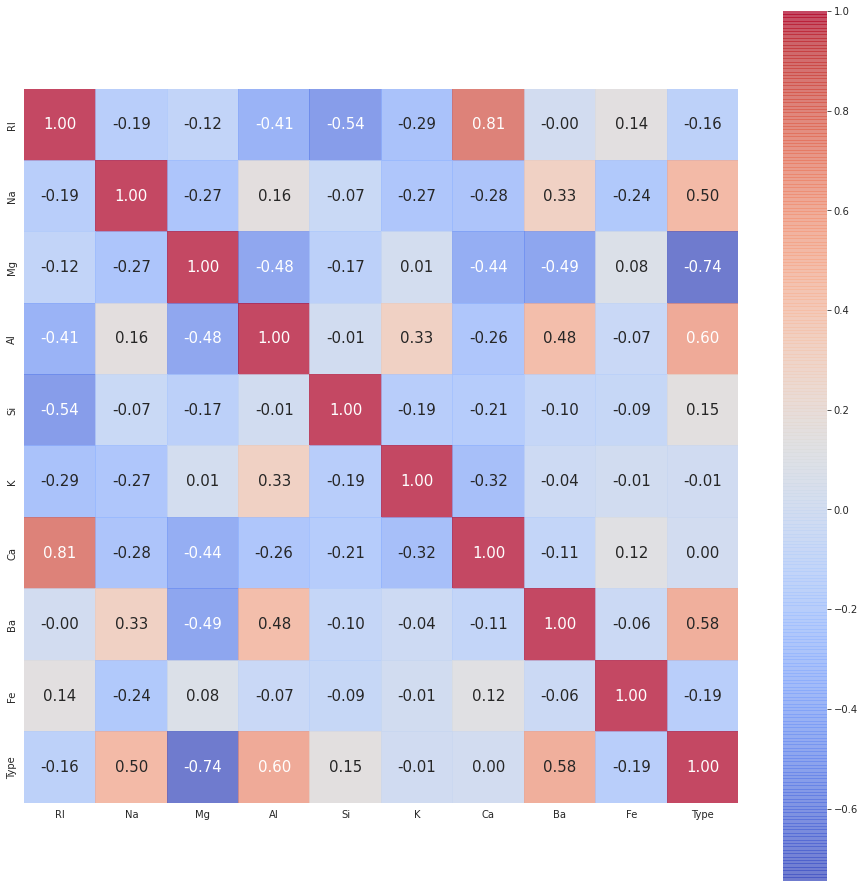

In [129]:
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            alpha = 0.7,   cmap= 'coolwarm')
plt.show()


SPLITTING THE DATA INTO TRAINING SET AND TESTING SET
Here we had split the training and testing data into 80% and 20%.

In [130]:
x = df.drop('Type', axis = 1).values
y = df['Type'].values.reshape(-1,1)

In [131]:
# Splitting dataset into Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [132]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (171, 9)
Shape of x_test:  (43, 9)
Shape of y_train:  (171, 1)
Shape of y_test:  (43, 1)


CLASSIFICATION MODELS
LOGISTIC REGRESSION:-


In [133]:
# Fitting Logistic Rregression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lg = LogisticRegression()
steps = [
         ('scalar', StandardScaler()),
         ('model', LogisticRegression())
        ]
lg_pipe = Pipeline(steps)

In [134]:
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state' : [42]
}
classifier_lg = GridSearchCV(lg_pipe, parameters, cv = 3)
classifier_lg = classifier_lg.fit(x_train, y_train.ravel())

In [135]:
from sklearn.metrics import accuracy_score

y_pred_lg_train = classifier_lg.predict(x_train)
accuracy_lg_train = accuracy_score(y_train, y_pred_lg_train)
print("Training set accuracy: ", accuracy_lg_train)

y_pred_lg_test = classifier_lg.predict(x_test)
accuracy_lg_test = accuracy_score(y_test, y_pred_lg_test)
print("Test set accuracy: ", accuracy_lg_test)

Training set accuracy:  0.6842105263157895
Test set accuracy:  0.7209302325581395


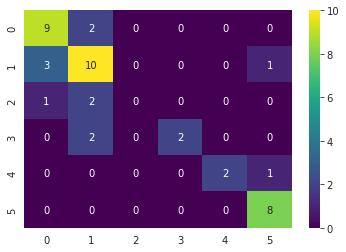

              precision    recall  f1-score   support

           1      0.692     0.818     0.750        11
           2      0.625     0.714     0.667        14
           3      0.000     0.000     0.000         3
           5      1.000     0.500     0.667         4
           6      1.000     0.667     0.800         3
           7      0.800     1.000     0.889         8

    accuracy                          0.721        43
   macro avg      0.686     0.617     0.629        43
weighted avg      0.692     0.721     0.692        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_lg_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_lg_test, digits=3))

KNN (WITH K=4):-


In [137]:
# KNN K-Nearest Neighbours 
# Fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
         ('scalar', StandardScaler()),
         ('model', KNeighborsClassifier())
        ]
knn_pipe = Pipeline(steps)

In [138]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1],
               
}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv = 3)
classifier_knn = classifier_knn.fit(x_train, y_train.ravel())

In [139]:
y_pred_knn_train = classifier_knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set accuracy: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set accuracy: ", accuracy_knn_test)

Training set accuracy:  1.0
Test set accuracy:  0.7441860465116279


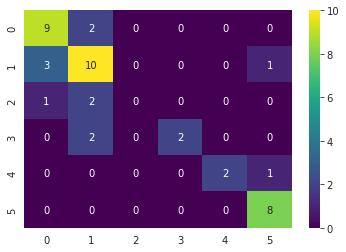

              precision    recall  f1-score   support

           1      0.611     1.000     0.759        11
           2      0.727     0.571     0.640        14
           3      0.000     0.000     0.000         3
           5      1.000     0.750     0.857         4
           6      1.000     0.667     0.800         3
           7      0.889     1.000     0.941         8

    accuracy                          0.744        43
   macro avg      0.705     0.665     0.666        43
weighted avg      0.721     0.744     0.713        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_lg_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_knn_test, digits=3))

SVM (SUPPORT VECTOR MACHINE LINEAR):-


In [141]:
# Support vector machine SVM
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
         ('scalar', StandardScaler()),
         ('model', SVC())
        ]
svm_linear_pipe = Pipeline(steps)

In [142]:
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42]
}
classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, cv = 3)
classifier_svm_linear = classifier_svm_linear.fit(x_train, y_train.ravel())

In [143]:
y_pred_svm_linear_train = classifier_svm_linear.predict(x_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set accuracy: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(x_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set accuracy: ", accuracy_svm_linear_test)

Training set accuracy:  0.7543859649122807
Test set accuracy:  0.7209302325581395


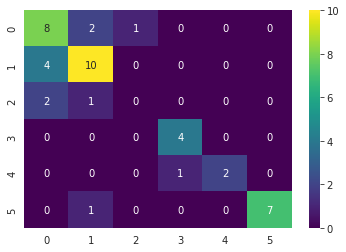

              precision    recall  f1-score   support

           1      0.571     0.727     0.640        11
           2      0.714     0.714     0.714        14
           3      0.000     0.000     0.000         3
           5      0.800     1.000     0.889         4
           6      1.000     0.667     0.800         3
           7      1.000     0.875     0.933         8

    accuracy                          0.721        43
   macro avg      0.681     0.664     0.663        43
weighted avg      0.709     0.721     0.708        43



In [144]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_svm_linear_test, digits=3))

DECISION TREE CLASIFIER (CART):-

In [145]:
# Decision Tree Classifier Cart
# Fitting CLassifier to the Training set
from sklearn.tree import DecisionTreeClassifier 
classfier_dt = DecisionTreeClassifier()
steps = [
         ('scalar', StandardScaler()),
         ('model', DecisionTreeClassifier())
        ]
dt_pipe = Pipeline(steps)

In [146]:
# Applying Grid to find the best model and the best parameters
parameters = [ { 'model__max_depth' : np.arange(1,21),
                 'model__min_samples_leaf' : [1, 5, 10, 20, 50, 100],
                 'model__min_samples_split' : np.arange(2, 11),
                 'model__criterion' : ["gini"],
                 'model__random_state' : [42]}
]

classifier_dt = GridSearchCV(estimator = dt_pipe,
                             param_grid = parameters,
                             cv = 3,
                             n_jobs = -1)
classifier_dt = classifier_dt.fit(x_train, y_train.ravel())

In [147]:
y_pred_dt_train = classifier_dt.predict(x_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set accuracy: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(x_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set accuracy: ", accuracy_dt_test)

Training set accuracy:  0.7543859649122807
Test set accuracy:  0.6976744186046512


Confusion matrix and classification metrics for CART:-


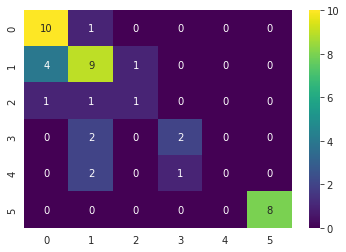

              precision    recall  f1-score   support

           1      0.667     0.909     0.769        11
           2      0.600     0.643     0.621        14
           3      0.500     0.333     0.400         3
           5      0.667     0.500     0.571         4
           6      0.000     0.000     0.000         3
           7      1.000     1.000     1.000         8

    accuracy                          0.698        43
   macro avg      0.572     0.564     0.560        43
weighted avg      0.649     0.698     0.666        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_dt_test, digits=3))

RANDOM FOREST CLASSIFICATION :

In [149]:
# Random Forest Classification
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()
steps = [
         ('scalar', StandardScaler()),
         ('model', RandomForestClassifier())
        ]
rf_pipe = Pipeline(steps)

In [150]:
parameters = [ { 'model__n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                 'model__max_features' : ["auto", "sqrt"],
                 'model__max_depth' : np.linspace(10, 110, num = 11),
                 'model__min_samples_split' : [2, 5, 10],
                 'model__min_samples_leaf' : [1, 2, 4],
                 'model__bootstrap' : [True, False],
                 'model__criterion' : ["gini"],
                 'model__random_state' : [42]}
]

classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                             param_distributions = parameters,
                             n_iter = 100,
                             cv = 3,
                             random_state = 42,
                             verbose = 4,
                             n_jobs = -1)
classifier_rf = classifier_rf.fit(x_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [151]:
y_pred_rf_train = classifier_rf.predict(x_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set accuracy: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(x_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set accuracy: ", accuracy_rf_test)

Training set accuracy:  0.9707602339181286
Test set accuracy:  0.813953488372093


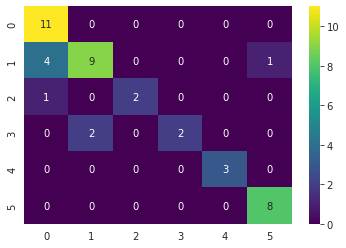

              precision    recall  f1-score   support

           1      0.688     1.000     0.815        11
           2      0.818     0.643     0.720        14
           3      1.000     0.667     0.800         3
           5      1.000     0.500     0.667         4
           6      1.000     1.000     1.000         3
           7      0.889     1.000     0.941         8

    accuracy                          0.814        43
   macro avg      0.899     0.802     0.824        43
weighted avg      0.840     0.814     0.806        43



In [152]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_rf_test, digits=3))

ANN(ARTIFICIAL NEURAL NETWORKS):-

In [153]:
# ANN (Artificial Neural Network)
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [154]:
# Feature Scaling
sc_x = StandardScaler()
x_train_scaled = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.fit_transform(x_test)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(171, 9)
(43, 9)


In [155]:
# Defining a function to encode output column
from tensorflow.keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encode = to_categorical(data)
    print('Shape of data (AFTER encode): %s\n' % str(encode.shape) )
    return encode

In [156]:
y_train_encoded = encode(y_train)

Shape of data (BEFORE encode): (171, 1)
Shape of data (AFTER encode): (171, 8)



In [157]:
y_test_encoded = encode(y_test)

Shape of data (BEFORE encode): (43, 1)
Shape of data (AFTER encode): (43, 8)



In [158]:
y_train_encoded = np.delete(y_train_encoded, [0,4], axis = 1)
y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)
print(y_train_encoded[2])
print(y_test_encoded[2])

[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]


In [159]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 9, kernel_initializer= 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer= 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer= 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(x_train_scaled, y_train_encoded, validation_data=(x_test_scaled, y_test_encoded), batch_size = 100, epochs = 1150)

Epoch 1/1150
2/2 [==============================] - 1s 209ms/step - loss: 1.7914 - accuracy: 0.2632 - val_loss: 1.7907 - val_accuracy: 0.3256
Epoch 2/1150
2/2 [==============================] - 0s 23ms/step - loss: 1.7899 - accuracy: 0.3099 - val_loss: 1.7897 - val_accuracy: 0.3488
Epoch 3/1150
2/2 [==============================] - 0s 27ms/step - loss: 1.7884 - accuracy: 0.3158 - val_loss: 1.7886 - val_accuracy: 0.2791
Epoch 4/1150
2/2 [==============================] - 0s 21ms/step - loss: 1.7869 - accuracy: 0.3450 - val_loss: 1.7876 - val_accuracy: 0.2558
Epoch 5/1150
2/2 [==============================] - 0s 21ms/step - loss: 1.7853 - accuracy: 0.3450 - val_loss: 1.7865 - val_accuracy: 0.2558
Epoch 6/1150
2/2 [==============================] - 0s 21ms/step - loss: 1.7838 - accuracy: 0.3450 - val_loss: 1.7855 - val_accuracy: 0.2558
Epoch 7/1150
2/2 [==============================] - 0s 23ms/step - loss: 1.7821 - accuracy: 0.3450 - val_loss: 1.7844 - val_accuracy: 0.2558
Epoch 8/1150

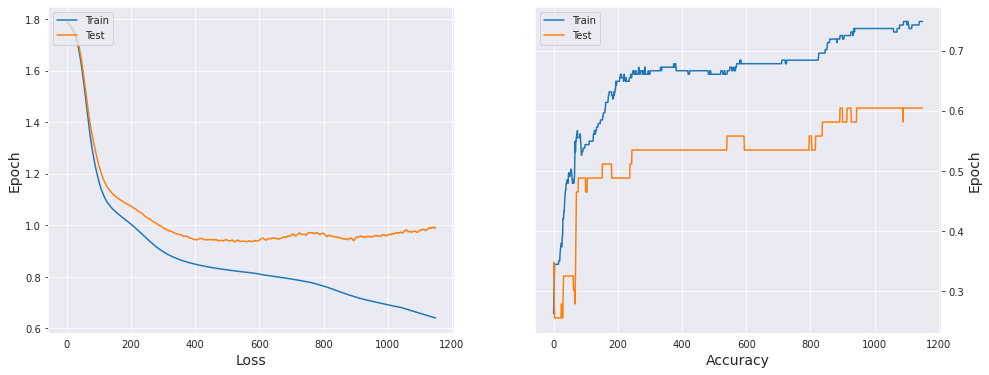

In [160]:
f, axes = plt.subplots(1,2,figsize=(16,6))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epoch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc = 'upper left')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc = 'upper left')

plt.show()

In [161]:
print("Training set accuracy: ", history.history.get('accuracy')[-1])
print("Test set accuracy: ", history.history.get('val_accuracy')[-1])

Training set accuracy:  0.7485380172729492
Test set accuracy:  0.604651153087616


COMPARING THE MODELS

Now we completed all the classification models and now we start comparing them based on the accuracy score. this is for 80% of training data and 20% of testing data.

In [162]:
# Comparing the Models

models = [('Logistic Regression', accuracy_lg_train, accuracy_lg_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', accuracy_svm_linear_train, accuracy_svm_linear_test),
          ('Decision Tree Classifcation', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test),
          ('ANN', history.history.get('accuracy')[-1], history.history.get('val_accuracy')[-1]), 
         ]

In [163]:
predict = pd.DataFrame(data = models, columns = ['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.684211,0.720930
1,KNN,1.000000,0.744186
2,SVM (Linear),0.754386,0.720930
3,Decision Tree Classifcation,0.754386,0.697674
4,Random Forest Classification,0.970760,0.813953
5,ANN,0.748538,0.604651


Now we visualize the models based on accuracy for the 80% of training data and 20% of testing data.

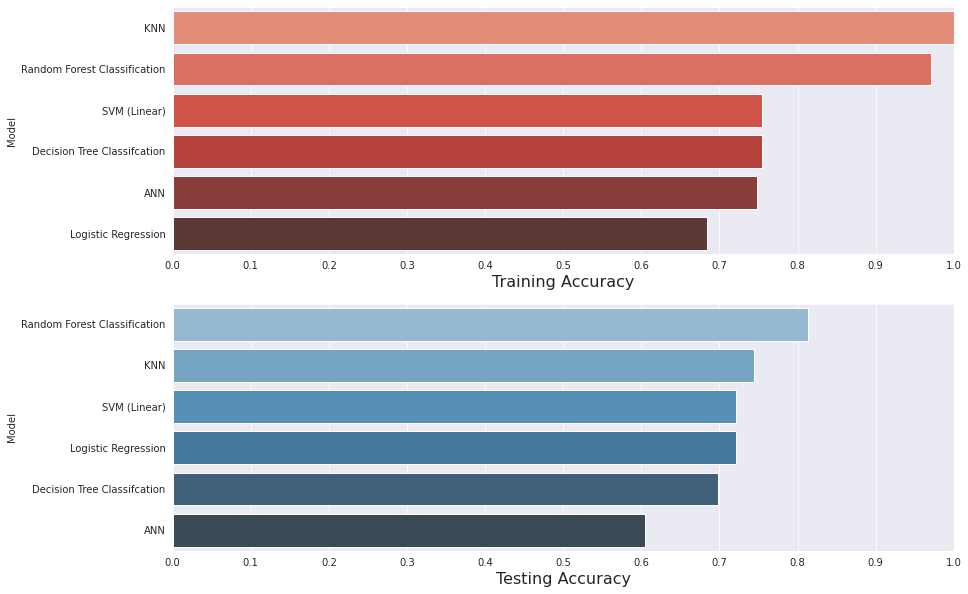

In [171]:
# Visualizing Models Performance

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette ='Reds_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Testing Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))